In [157]:
import warnings
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

In [158]:
warnings.filterwarnings('ignore')

In [159]:
rcParams["figure.figsize"] = 15, 8

In [160]:
opendata = pd.read_csv("opendata.csv", engine='python')

In [161]:
print(opendata.shape)
opendata.head(100)

(74842, 4)


,name,region,date,value
0,Количество заявок на потребительские кредиты,Россия,2013-01-15,571147
1,Количество заявок на потребительские кредиты,Россия,2013-02-15,504508
2,Количество заявок на потребительские кредиты,Россия,2013-03-15,628803
3,Количество заявок на потребительские кредиты,Россия,2013-04-15,836054
4,Количество заявок на потребительские кредиты,Россия,2013-05-15,867235
...,...,...,...,...
95,Количество заявок на потребительские кредиты,Алтайский край,2014-11-15,16407
96,Количество заявок на потребительские кредиты,Алтайский край,2014-12-15,18096
97,Количество заявок на потребительские кредиты,Алтайский край,2015-01-15,5614
98,Количество заявок на потребительские кредиты,Алтайский край,2015-02-15,7245


In [162]:
opendata['date'].value_counts()

2015-03-15    1260
2016-11-15    1260
2018-02-15    1260
2015-06-15    1260
2017-01-15    1260
              ... 
2013-10-15     336
2013-03-15     336
2013-09-15     336
2013-05-15     336
2013-12-15     336
Name: date, Length: 73, dtype: int64

In [163]:
dates = list(set(opendata.date))
dates.sort()
for item in range(len(dates)):
    print(item, dates[item])

0 2013-01-15
1 2013-02-15
2 2013-03-15
3 2013-04-15
4 2013-05-15
5 2013-06-15
6 2013-07-15
7 2013-08-15
8 2013-09-15
9 2013-10-15
10 2013-11-15
11 2013-12-15
12 2014-01-15
13 2014-02-15
14 2014-03-15
15 2014-04-15
16 2014-05-15
17 2014-06-15
18 2014-07-15
19 2014-08-15
20 2014-09-15
21 2014-10-15
22 2014-11-15
23 2014-12-15
24 2015-01-15
25 2015-02-15
26 2015-03-15
27 2015-04-15
28 2015-05-15
29 2015-06-15
30 2015-07-15
31 2015-08-15
32 2015-09-15
33 2015-10-15
34 2015-11-15
35 2015-12-15
36 2016-01-15
37 2016-02-15
38 2016-03-15
39 2016-04-15
40 2016-05-15
41 2016-06-15
42 2016-07-15
43 2016-08-15
44 2016-09-15
45 2016-10-15
46 2016-11-15
47 2016-12-15
48 2017-01-15
49 2017-02-15
50 2017-03-15
51 2017-04-15
52 2017-05-15
53 2017-06-15
54 2017-07-15
55 2017-08-15
56 2017-09-15
57 2017-10-15
58 2017-11-15
59 2017-12-15
60 2018-01-15
61 2018-02-15
62 2018-03-15
63 2018-04-15
64 2018-05-15
65 2018-06-15
66 2018-07-15
67 2018-08-15
68 2018-09-15
69 2018-10-15
70 2018-11-15
71 2018-12-15
72

In [164]:
opendata['region'].unique()

array(['Россия', 'Алтайский край', 'Амурская область',
       'Архангельская область', 'Астраханская область',
       'Белгородская область', 'Брянская область', 'Владимирская область',
       'Волгоградская область', 'Вологодская область',
       'Воронежская область', 'Еврейская автономная область',
       'Забайкальский край', 'Ивановская область', 'Иркутская область',
       'Кабардино-Балкарская Республика', 'Калининградская область',
       'Калужская область', 'Камчатский край', 'Кемеровская область',
       'Кировская область', 'Костромская область', 'Краснодарский край',
       'Красноярский край', 'Курганская область', 'Курская область',
       'Ленинградская область', 'Липецкая область', 'Магаданская область',
       'Москва', 'Московская область', 'Мурманская область',
       'Ненецкий автономный округ', 'Нижегородская область',
       'Новгородская область', 'Новосибирская область', 'Омская область',
       'Оренбургская область', 'Орловская область', 'Пензенская область',

In [165]:
opendata['name'].unique()

array(['Количество заявок на потребительские кредиты',
       'Средняя сумма заявки на потребительский кредит',
       'Количество заявок на ипотечные кредиты',
       'Средняя сумма заявки на ипотечный кредит',
       'Количество новых депозитов', 'Средняя сумма нового депозита',
       'Средняя зарплата', 'Средняя пенсия',
       'В среднем руб. на текущем счете на человека',
       'В среднем депозитов в руб. на человека',
       'Средние расходы по картам', 'Средний чек в формате Фастфуд',
       'Средний чек в формате Ресторан',
       'Средние траты в ресторане фастфуд', 'Средние траты в ресторане'],
      dtype=object)

In [167]:
name = input('Введите показатель для отчета:')
subject = input('Введите субъет для отчета:')
date_1 = abs(int(input('Введите код даты начала исследуемого периода:')))
date_2 = abs(int(input('Введите код даты окончания исследуемого периода:')))

Введите показатель для отчета:Средний чек в формате Фастфуд
Введите субъет для отчета:Калужская область
Введите код даты начала исследуемого периода:0
Введите код даты окончания исследуемого периода:55


In [168]:
print(f'показатель - {name}')
print(f'субъект - {subject}')
print(f'дата начала- {dates[date_1]}')
print(f'дата окончания- {dates[date_2]}')

показатель - Средний чек в формате Фастфуд
субъект - Калужская область
дата начала- 2013-01-15
дата окончания- 2017-08-15


In [169]:
subject_data = opendata[(opendata['name'] == name) & (opendata['region'] == subject) & 
   (opendata['date'] >= dates[date_1]) & (opendata['date'] <= dates[date_2])]

In [170]:
country_data = opendata[(opendata['name'] == name) & (opendata['region'] == 'Россия') & 
   (opendata['date'] >= dates[date_1]) & (opendata['date'] <= dates[date_2])]

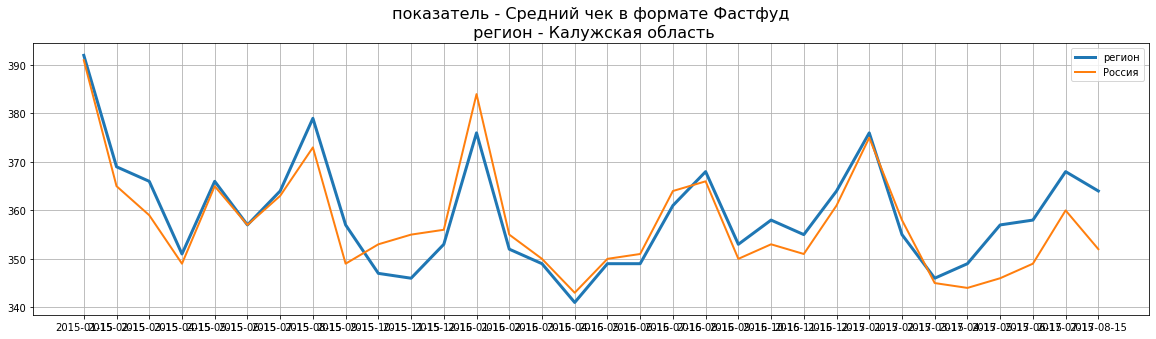

In [174]:
plt.figure(figsize=(20, 5))
plt.plot(subject_data.date, subject_data.value, linewidth=3)
plt.plot(country_data.date, country_data.value, linewidth=2)
plt.grid()
plt.title(f'показатель - {name}\n регион - {subject}', fontsize=16)
plt.legend(labels=["регион", "Россия"])
plt.show()

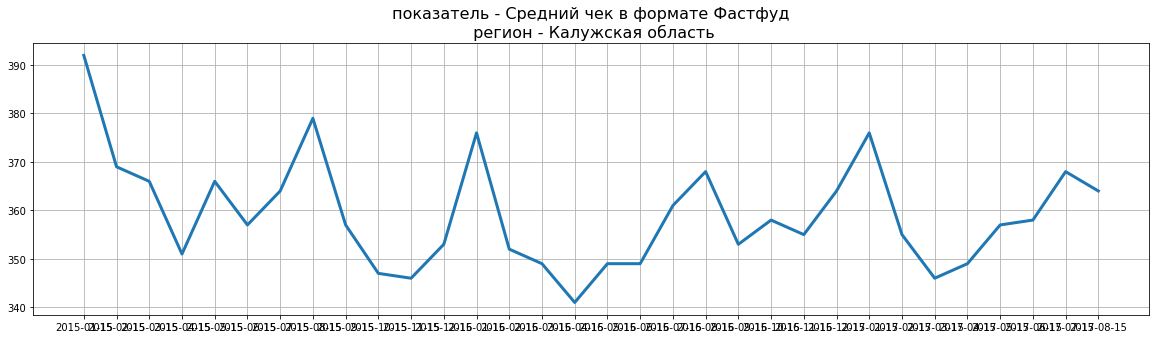

In [172]:
plt.figure(figsize=(20, 5))
plt.plot(subject_data.date, subject_data.value, linewidth=3)
plt.grid()
plt.title(f'показатель - {name}\n регион - {subject}', fontsize=16)
plt.show()

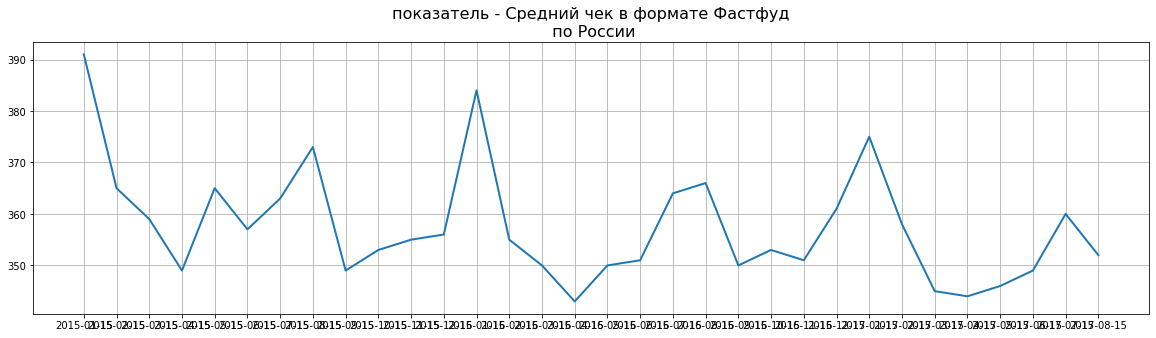

In [175]:
plt.figure(figsize=(20, 5))
plt.plot(country_data.date, country_data.value, linewidth=2)
plt.grid()
plt.title(f'показатель - {name}\n по России', fontsize=16)
plt.show()